# **Cross-Validation**

#### **Learning Points**
- Define cross-validation.
- Explain why cross-validation should be used.
- Define k-fold cross-validation and leave-one-out cross-validation.
- Compare cross-validation techniques.
- Implement cross-validation using scikit-learn.

#### **Cross-validation**
For a large dataset, splitting into training, validation, and test data may leave some important instances out of the training set. Consequently, alternative methods that resample the data give a better measure of model performance. ***Cross-validation*** refers to resampling methods that use different portions of the sample data to train and validate a model. For each model trained/validated, a measure of error is used to measure performance. The distribution of the errors for the models found in cross-validation gives a rough idea of the model's performance overall.

Many types of cross-validation exist, but the most common is k-fold cross-validation. ***k-fold cross-validation*** is a method of evaluating model performance where, after separating out test data, sample data is split into k groups (folds) and the model is trained and validated repeatedly using these groups.

Below describes a 5-fold cross-validation evaluating the performance of a linear model using data from the "bad drivers" dataset. This dataset contains information on car accidents and car insurance premiums from the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners.

1. Data from 11 states is separated into test data. The remaining 40 instances are split into 5 folds of 8 states each.
2. Model 1 is trained using the instances from folds 1 through 4 and validated using instances from fold 5 to measure the error.
3. Model 2 is trained using folds 1, 2, 3, and 5, and then validated using fold 4. Models 3 through 5 are trained and validated similarly.
4. The mean, standard deviation, and distribution of the cross-validation errors give an estimate of the model's overall performance. Ex: The distribution of the five models' MSE has mean 19576 and SD 8056.

#### **Ex. 10-fold cross validation:**

11 of the 51 instances in the bad drivers data can be set aside as test data, leaving 40 instances to carry out a 10-fold cross-validation.

- Each fold would contain 4 instances
- Each model would be trained on 36 instances
- Each model trained would be validated using 4 instances
- 10 models in total would be trained
- Each model would have 11 instances in the test set


#### **k-fold cross-validation - Python**

The code below loads the bad drivers dataset, splits off 11 instances (20%) of the dataset as test data, and carries out a 10-fold cross-validation and a LOOCV using mean squared error as the scoring method. In the code, a negative sign is affixed to the cross_val_score calls to correct the sign change from neg_mean_square_error.

- Click the double right arrow icon to restart the kernel and run all cells.
- Examine the code below.
- Note the difference scores for the two types of cross-validations.


In [2]:
# Import packages and functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Import dataset
badDrivers = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/bad-drivers.csv')

# Split off 20% of the data to be left out as test data
badDriversTrainingdata, testData = train_test_split(badDrivers, test_size=0.20)

# Store relevant columns as variables
X = badDriversTrainingdata[
    ['Losses incurred by insurance companies for collisions per insured driver ($)']
].values.reshape(-1, 1)
y = badDriversTrainingdata[['Car Insurance Premiums ($)']].values.reshape(-1, 1)

Text(0, 0.5, 'Car insurance premiums')

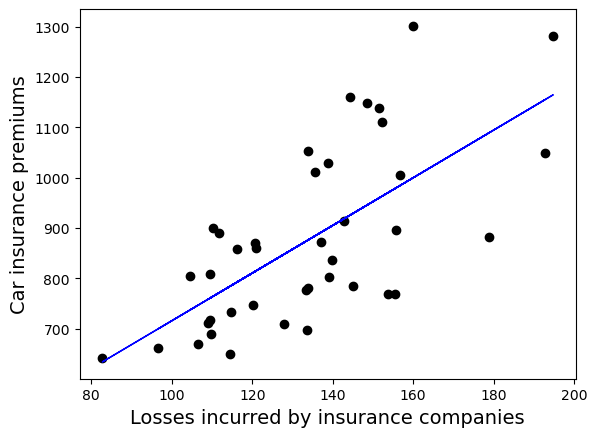

In [4]:
# Fit a linear model to the data
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Plot the fitted model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=1)
plt.xlabel('Losses incurred by insurance companies', fontsize=14)
plt.ylabel('Car insurance premiums', fontsize=14)

In [5]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(
    linModel, X, y, scoring='neg_mean_squared_error', cv=10
)

In [9]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores2 = -cross_val_score(
    linModel, X, y, cv=10
)

In [6]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=40)

([<matplotlib.axis.XTick at 0x15e7e7af0>,
 [Text(0, 0, '10-fold'), Text(1, 0, 'LOOCV')])

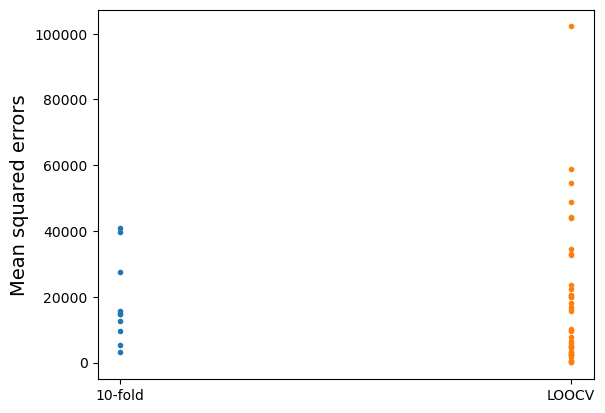

In [7]:
# Plot the errors for both scores
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14)
plt.xticks([0, 1], ['10-fold', 'LOOCV'])